# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [2]:
# Creating a Path
path = r'/Users/jacob/Desktop/Instacart Basket Analysis'

In [3]:
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_depts.pkl'))

In [16]:
df_ords_prods_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_orders', 'order_frequency_flag',
       'region', 'customer_activity', 'age_group', 'income_group',
       'department', 'family_type', 'buyer_type', 'buyer_type_hour'],
      dtype='object')

# Visualizations

## Busiest day of the week 

Text(0, 0.5, 'Number of Orders')

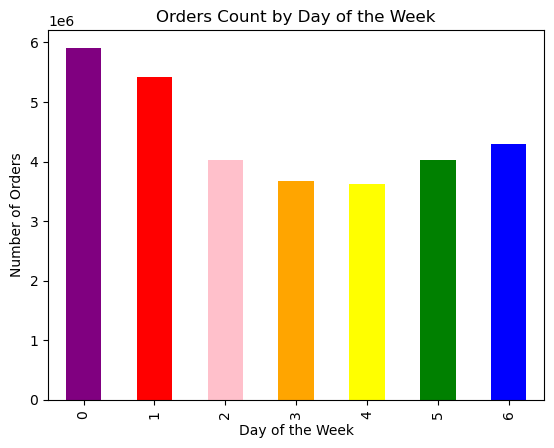

In [9]:
# Sort by index 

bar = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title("Orders Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

In [10]:
# Export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_day_of_week.png'))

## Busiest Hour of the Day

Text(0, 0.5, 'Number of Orders')

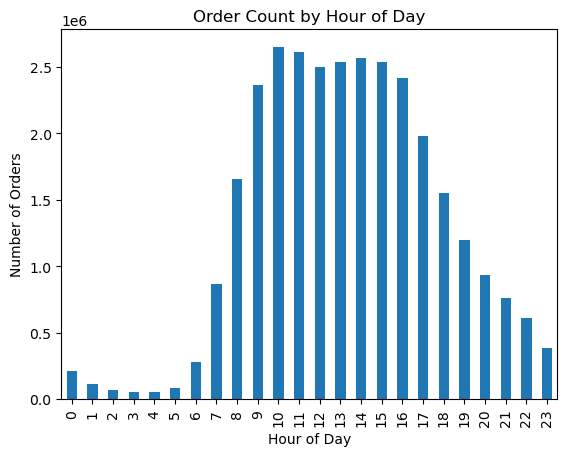

In [7]:
bar2 = df_ords_prods_all['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title("Order Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")

In [8]:
# Export chart

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_hour_of_day.png'))

## Line Chart times of the day where people spend more money

### Sampling Data

In [11]:
# Create a list holding True/False values to the test np.random.ran <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

### Split the dataframe into two Samples

In [13]:
# Store 70% of the Sample in the Dataframe "big"
big = df_ords_prods_all[dev]

In [14]:
# Store 30% of the Sample in the Dataframe "small"
small = df_ords_prods_all[~dev]

In [17]:
# Reducing the 'small' sample to only the columns necessary for the chart, namely “prices” and “order_hour_of_day"
df_2 = small[['order_hour_of_day','prices']]

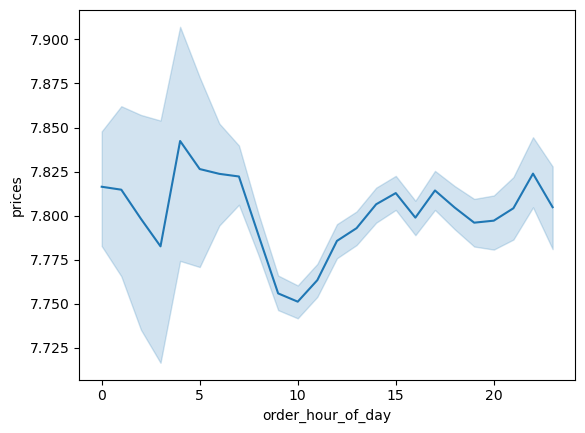

In [18]:
# Creating the Line Chart for the 'small' Sample
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [21]:
# Exporting the Line Chart from the 'small' Sample outside of Jupyter
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_timeoftheday.png'))

In [19]:
# Reducing the 'big' sample to only the columns necessary for the chart, namely “prices” and “order_hour_of_day"
df_3 = big[['order_hour_of_day','prices']]

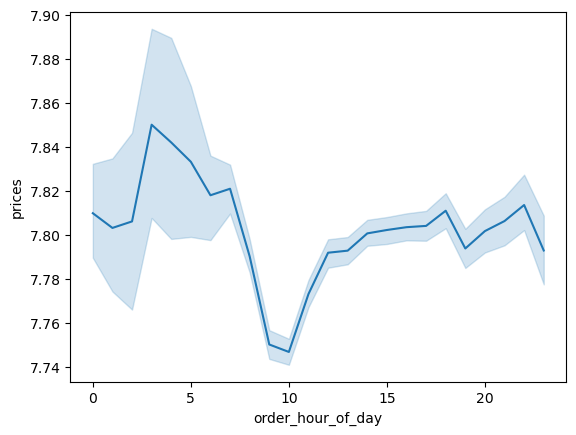

In [20]:
# Creating the Line Chart for the 'big' Sample
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [22]:
# Exporting the Line Chart from the 'big' Sample outside of Jupyter
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_timeoftheday_2.png'))

## Implementing a simplified grouping of products by price range

In [23]:
# Checking prices distribution

df_ords_prods_all.agg({'prices': ['min', 'mean', 'max']}).to_clipboard()

In [24]:
# Assigning range groups

df_ords_prods_all.loc[df_ords_prods_all['prices'] <= 5, 'product_price_range'] = 'low price'
df_ords_prods_all.loc[(df_ords_prods_all['prices'] > 5) & (df_ords_prods_all['prices'] < 15), 'product_price_range'] = 'mid price'
df_ords_prods_all.loc[df_ords_prods_all['prices'] >= 15, 'product_price_range'] = 'high price'

In [25]:
df_ords_prods_all.head()

,user_id,gender,state,age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,order_frequency_flag,region,customer_activity,age_group,income_group,department,family_type,buyer_type,buyer_type_hour,product_price_range
0,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,Non-frequent customer,West,high activity,30-39,Working Class,beverages,single no dependants,Weekend Buyer,Late Buyer,mid price
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,Non-frequent customer,West,high activity,30-39,Working Class,beverages,single no dependants,Weekly Buyer,Late Buyer,mid price
2,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Non-frequent customer,West,high activity,30-39,Working Class,beverages,single no dependants,Weekly Buyer,Early Buyer,low price
3,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,Frequent customer,West,high activity,30-39,Middle Class,beverages,married with dependants,Weekly Buyer,Late Buyer,mid price
4,65803,Male,Idaho,35,1/1/2017,2,married,99568,142275,8,...,Frequent customer,West,high activity,30-39,Middle Class,beverages,married with dependants,Weekend Buyer,Late Buyer,mid price


Text(0.5, 1.0, 'Price Grouping - Counts of Each Group')

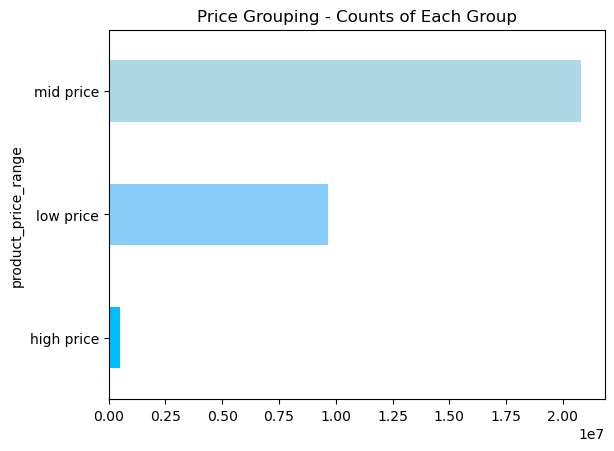

In [26]:
# Bar Chart
price_range = df_ords_prods_all['product_price_range'].value_counts().plot.barh(color = ['lightblue', 'lightskyblue', 'deepskyblue'])
plt.gca().invert_yaxis()
plt.title("Price Grouping - Counts of Each Group")

In [27]:
# Save Visualization
price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_grouping.png'))

In [28]:
# Calculate the percentage of each grouping relative to the total

price_counts = df_ords_prods_all['product_price_range'].value_counts()
total_rows = len(df_ords_prods_all)
percentage_of_whole = (price_counts / total_rows) * 100
percentage_of_whole

product_price_range
mid price     67.169623
low price     31.244871
high price     1.569757
Name: count, dtype: float64

## Department Purchases by Number of orders

Text(0.5, 0, 'Orders')

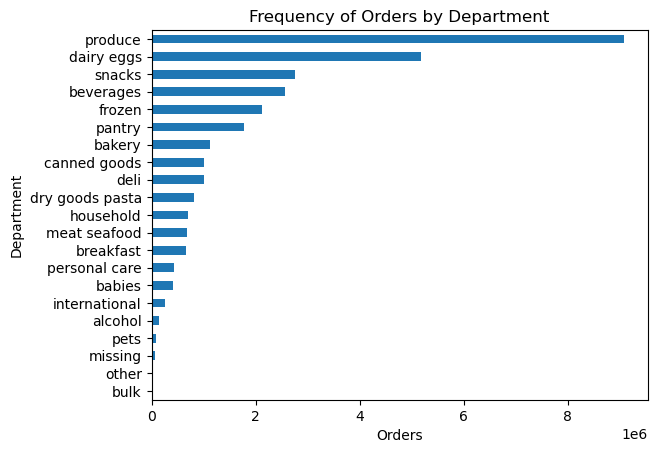

In [34]:
dep_ord_freq = df_ords_prods_all['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Frequency of Orders by Department")
plt.ylabel("Department")
plt.xlabel("Orders")

In [38]:
# Save Visualization
dep_ord_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_ord_freq.png'))

In [39]:
# Calculate price diferences between produce and dairy eggs departments

produce_freq = df_ords_prods_all[df_ords_prods_all['department'] == 'produce']['order_id'].count()
dairy_eggs_freq = df_ords_prods_all[df_ords_prods_all['department'] == 'dairy eggs']['order_id'].count()
percent_dif = ((produce_freq - dairy_eggs_freq) / dairy_eggs_freq) * 100

In [40]:
percent_dif

75.37099376185009

## Distribution of users in regard of the brand loyalty

In [43]:
# Setting color variable

loyalty_colors = ['green', 'blue', 'red']

Text(0.5, 0, 'Count')

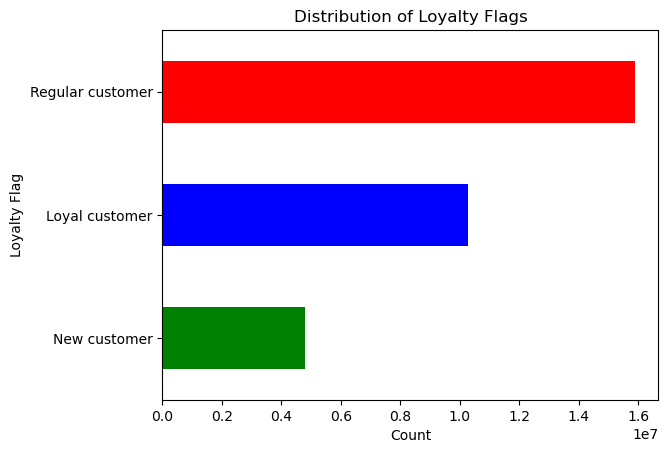

In [45]:
# Distribution among users in regard of their brand loyalty

loyalty_flag_counts = df_ords_prods_all['loyalty_flag'].value_counts().sort_values(ascending=True).plot.barh(color = loyalty_colors)
plt.title("Distribution of Loyalty Flags")
plt.ylabel("Loyalty Flag")
plt.xlabel("Count")

In [46]:
# Save Visualization
loyalty_flag_counts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_counts.png'))

In [47]:
# Calculate the percentage of each grouping relative to the total

loyal_counts = df_ords_prods_all['loyalty_flag'].value_counts()
total_rows = len(df_ords_prods_all)
percent_of_whole = (loyal_counts / total_rows) * 100
percent_of_whole

loyalty_flag
Regular customer    51.274046
Loyal customer      33.212479
New customer        15.513475
Name: count, dtype: float64

## Variation in ordering habits based on loyalty status

In [51]:
# Checking the frequency of what days of the week each grouping of customer orders

loyalty_day_of_week = pd.crosstab(df_ords_prods_all['orders_day_of_week'],df_ords_prods_all['loyalty_flag'],dropna=False)

In [52]:
loyalty_day_of_week

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818892,2749383
2,1352343,625286,2047075
3,1266495,560415,1842622
4,1292042,535931,1797021
5,1456715,587715,1989296
6,1318366,690559,2282378


In [55]:
# Setting color variable

loyalty_colors = ['blue', 'green', 'orange']

Text(0, 0.5, 'Order frequency')

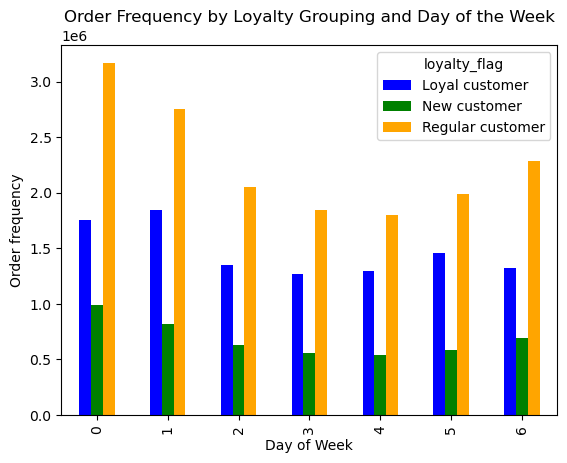

In [58]:
# Visualizing relationship

loyalty_day_of_week_bar = loyalty_day_of_week.plot.bar(color = loyalty_colors)
plt.title("Order Frequency by Loyalty Grouping and Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Order frequency")

In [59]:
# Save Visualization
loyalty_day_of_week_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_day_of_week_bar.png'))

In [60]:
# Checking the frequency of what hour of day each grouping of customer orders

loyalty_hour_of_day = pd.crosstab(df_ords_prods_all['order_hour_of_day'],df_ords_prods_all['loyalty_flag'],dropna=False)

In [61]:
loyalty_hour_of_day

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,35311,110983
1,30179,20674,58768
2,17788,12241,35662
3,13374,9510,25912
4,16882,8442,25439
5,29350,12475,42593
6,112865,33901,134247
7,346694,102170,414349
8,643895,208122,807091


Text(0, 0.5, 'Order frequency')

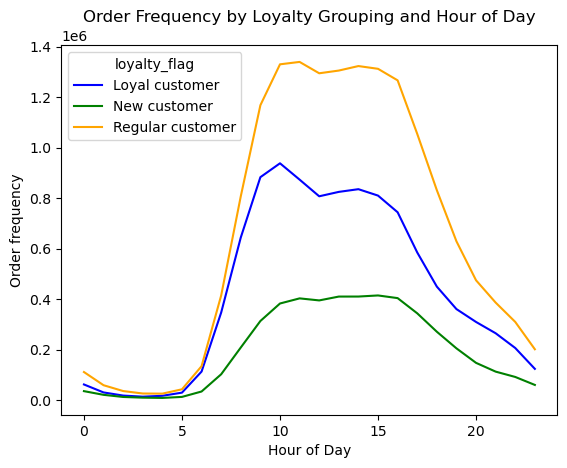

In [64]:
# Bar Chart. visualizing relationship

loyalty_hour_of_day_bar = loyalty_hour_of_day.plot.line(color = loyalty_colors)
plt.title("Order Frequency by Loyalty Grouping and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Order frequency")

In [65]:
# Save Visualization
loyalty_hour_of_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_hour_of_day.png'))

In [66]:
# Checking for departmental ordering habits among different loyalty groups

loyalty_dep = pd.crosstab(df_ords_prods_all['department'],df_ords_prods_all['loyalty_flag'],dropna=False)

In [67]:
loyalty_dep

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396646,1320234
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750050,2596419
deli,324046,158335,521453


Text(0.5, 1.0, 'Department Purchases by Loyalty Grouping')

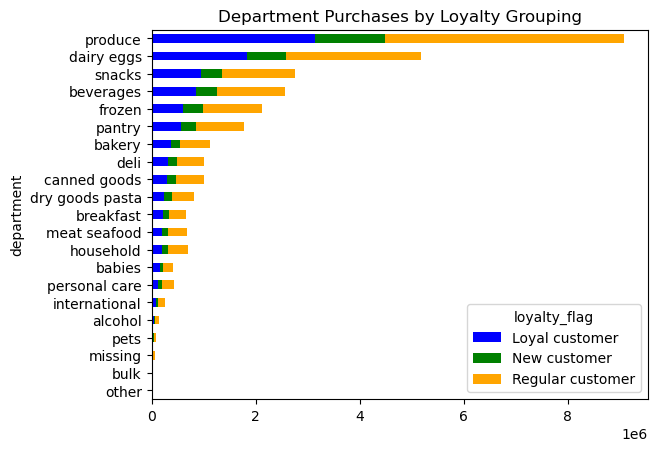

In [68]:
# Visualizing relationship

loyalty_dep_bar = loyalty_dep.sort_values(by=['Loyal customer'], ascending=True).plot.barh(color = loyalty_colors, stacked = True)
plt.title("Department Purchases by Loyalty Grouping")

In [69]:
loyalty_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_dep_bar.png'))

## Connections between age and family status in terms of ordering habits

In [73]:
# Defining Color
age_colors = ['powderblue', 'lightskyblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'navy']

Text(0.5, 1.0, 'Age Groups in Family Statuses')

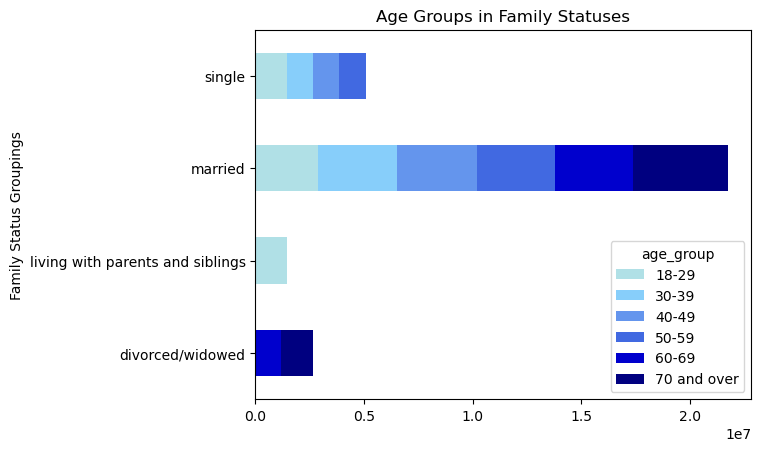

In [74]:
# Age groups making up each family status group

ct = pd.crosstab(df_ords_prods_all['fam_status'], df_ords_prods_all['age_group'])
age_fam = ct.plot(color = age_colors, kind='barh', stacked=True)
plt.ylabel("Family Status Groupings")
plt.title('Age Groups in Family Statuses')

In [75]:
# Save Visualization
age_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_fam_status.png'))

In [77]:
# Show family status ordering distribution

fam_order_counts = df_ords_prods_all.groupby('fam_status')['order_id'].nunique()

Text(0, 0.5, 'Number of Orders')

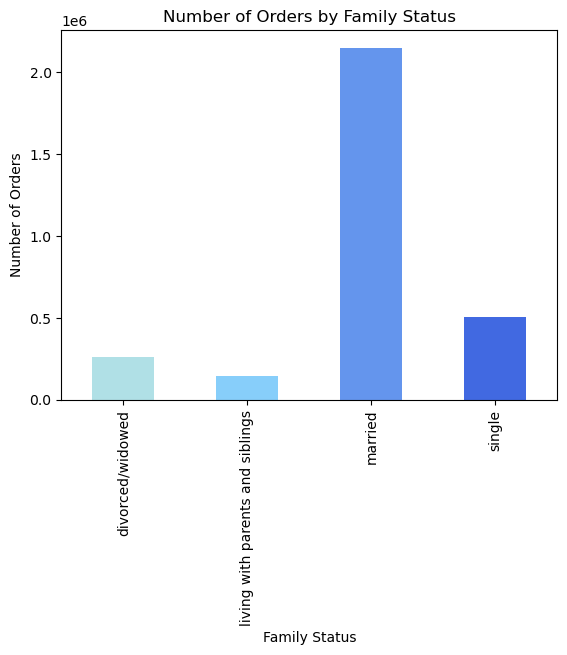

In [79]:
# Bar Chart
order_counts_by_fam = fam_order_counts.plot.bar(color = age_colors)
plt.title("Number of Orders by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Number of Orders")

In [80]:
# Save Visualization
order_counts_by_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_counts_by_fam.png'))

## What differences are there in the ordering habits of different customer profiles? Price of orders/frequency/products ordered

In [81]:
# Setting color variables

age_colors = ['powderblue', 'lightskyblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'navy']
income_colors = ['yellowgreen', 'limegreen', 'forestgreen', 'darkgreen']
fam_colors = ['violet', 'mediumorchid', 'rebeccapurple', 'indigo']

In [82]:
# Price by age

average_prices_by_age = df_ords_prods_all.groupby('age_group')['average_price'].mean().reset_index()

Text(0, 0.5, 'Average Price')

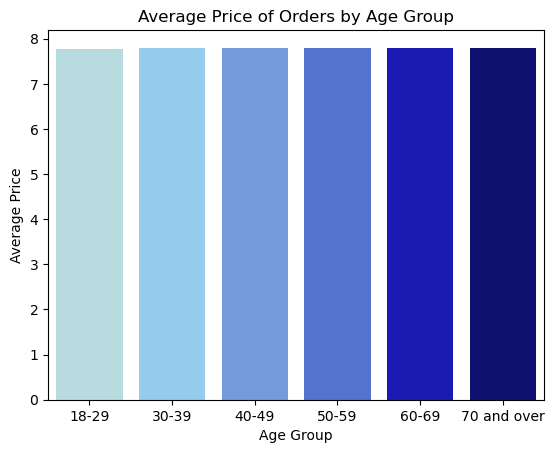

In [83]:
age_price_bar = sns.barplot(data=average_prices_by_age, x='age_group', y='average_price', palette=age_colors)
plt.title("Average Price of Orders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Price")

In [84]:
# Save Visualization
age_price_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_price_bar.png'))

In [85]:
# Products ordered by age

product_counts_by_age = df_ords_prods_all.groupby('age_group')['product_id'].count().reset_index()
product_counts_by_age.columns = ['age_group', 'product_count']

Text(0, 0.5, 'Product Count')

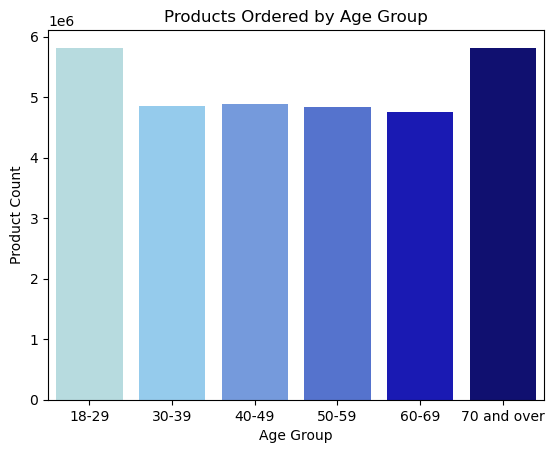

In [86]:
# Bar Chart
prods_age = sns.barplot(data=product_counts_by_age, x='age_group', y='product_count', palette=age_colors)
plt.title("Products Ordered by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Product Count")

Text(0.5, 0, 'Hour of Day')

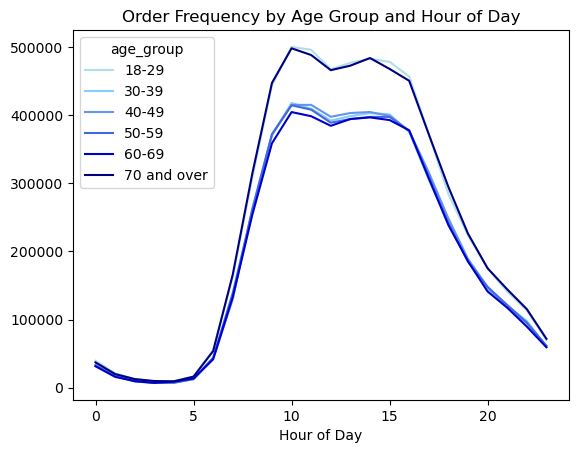

In [96]:
# Order hour of the day by age group

age_hour_of_day = pd.crosstab(df_ords_prods_all['order_hour_of_day'],df_ords_prods_all['age_group'],dropna=False)
age_hour_of_day_line = age_hour_of_day.plot.line(color = age_colors)
plt.title("Order Frequency by Age Group and Hour of Day")
plt.xlabel("Hour of Day")

In [97]:
# Save visualization
age_hour_of_day_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_hour_of_day_line.png'))

In [88]:
# Price by income

average_prices_by_income = df_ords_prods_all.groupby('income_group')['average_price'].mean().reset_index()

Text(0, 0.5, 'Average Price')

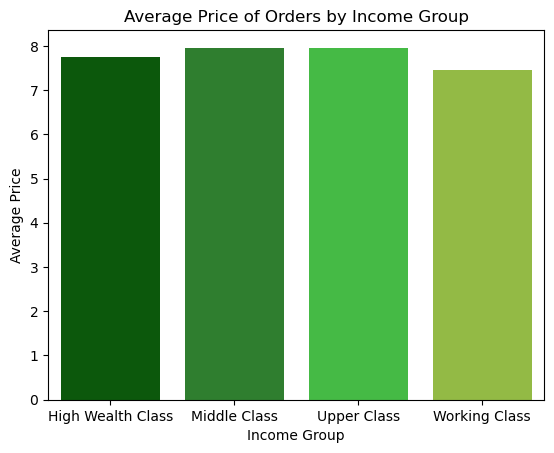

In [89]:
# Bar Chart
income_price_bar = sns.barplot(data=average_prices_by_income, x='income_group', y='average_price', palette=income_colors[::-1])
plt.title("Average Price of Orders by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Average Price")

In [90]:
# Save Visualization
income_price_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_price_bar.png'))

In [91]:
# Order frequency by income

order_frequency_by_income = df_ords_prods_all['income_group'].value_counts().reset_index()
order_frequency_by_income.columns = ['income_group', 'order_frequency']

Text(0, 0.5, 'Order Frequency')

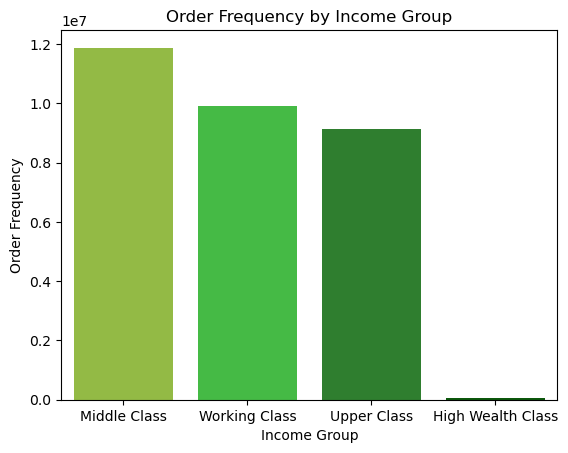

In [92]:
# Bar Chart
income_freq = sns.barplot(data=order_frequency_by_income, x='income_group', y='order_frequency', palette=income_colors)
plt.title("Order Frequency by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Order Frequency")

In [93]:
# Save Visualization
income_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_freq.png'))

Text(0.5, 0, 'Hour of Day')

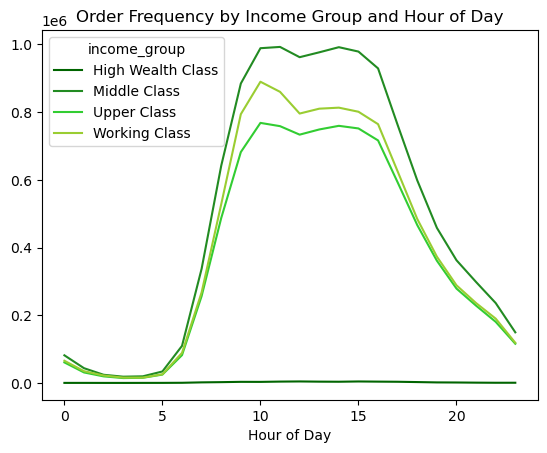

In [94]:
# Order hour of the day by income group

income_hour_of_day = pd.crosstab(df_ords_prods_all['order_hour_of_day'],df_ords_prods_all['income_group'],dropna=False)
income_hour_of_day_bar = income_hour_of_day.plot.line(color = income_colors[::-1])
plt.title("Order Frequency by Income Group and Hour of Day")
plt.xlabel("Hour of Day")

In [95]:
# Save visualization
income_hour_of_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_hour_of_day_bar.png'))